  <center>
  <img src="https://drive.google.com/uc?id=1j-EaD43_nEaiXoaQPxj0YafMuDkxwKze" width=200 >
  <font size="5"><b> <center> Inteligencia Geoespacial Servicios de Ingenierìa S.A.S.     </b> <br> </font>
  <font size="5"><b> <center> Python para Geociencias </b> <br> </font>
  <font size="4"><b> <center> CNN implementation using image segmentation for vehicle detection </b> <br> </font>
  <font size="5"><b> <center>@Autor: M. en C. Kevin Axel Vargas-Zamudio </b> <br> </font>
  <font size="3"><b> <center>email: kevinvargasz@cartosense.mx </b><br></font>

# **Semantic Segmentation Using HAGDAVS Dataset**

### **Import Libraries**

In [1]:
%%capture
# !pip uninstall tensorflow -y
# !pip uninstall tensorflow-io -y
!pip install tensorflow
!pip install --no-deps tensorflow-io

In [2]:
import tensorflow as tf
import tensorflow_io as tfio
from tensorflow import keras
from tensorflow.keras import layers
import os

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
import pathlib
from PIL import Image
import shutil
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.data import AUTOTUNE

## **Load Data**

This code performs the following actions:

1. Defines directory paths for the input data, including the folder containing RGB images and the folder containing masks.
2. Sets the destination folder path to save the modified images.
3. Creates the new destination folder if it doesn't exist.
4. Retrieves the list of file names in the masks folder.
5. Iterates over each file in the list and does the following:
   - Checks if the file name contains the text "MClass".
   - If it does, modifies the file name by replacing "MClass" with "RGB".
   - Creates an old file path and a new file path.
   - Copies the old file to the new path.

In summary, the code takes masks in the "MClass" format and copies them to a new folder, but changes their names to the "RGB" format.

In [3]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Py4Geo/Datos_HAGDAVS/HAGDAVS')

Mounted at /content/drive


In [73]:
import sys
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython']

In [4]:
data_path = pathlib.Path('/content/drive/My Drive/Py4Geo/Datos_HAGDAVS/HAGDAVS')
images_dir = data_path / 'RGB'
masks_dir = data_path / 'MASK'
print(masks_dir)

folder_path = masks_dir  # Ruta de la carpeta que contiene las imágenes
new_folder_path = '/content/drive/My Drive/Py4Geo/Datos_HAGDAVS/Pruebas/HAGDAVS/MASK'
os.makedirs(new_folder_path,exist_ok = True)

/content/drive/My Drive/Py4Geo/Datos_HAGDAVS/HAGDAVS/MASK


In [5]:
file_list = os.listdir(folder_path)
print(file_list)
print(f'El folder contiene {len(file_list)} archivos')

['El_Retiro_MClass_1_3.tif', 'El_Retiro_MClass_2_1.tif', 'El_Retiro_MClass_2_3.tif', 'El_Retiro_MClass_2_2.tif', 'El_Retiro_MClass_1_4.tif', 'El_Retiro_MClass_2_4.tif', 'El_Retiro_MClass_3_1.tif', 'El_Retiro_MClass_3_2.tif', 'El_Retiro_MClass_4_1.tif', 'El_Retiro_MClass_3_4.tif', 'El_Retiro_MClass_4_2.tif', 'El_Retiro_MClass_3_3.tif', 'El_Retiro_MClass_4_4.tif', 'El_Retiro_MClass_4_3.tif', 'El_Retiro_MClass_5_1.tif', 'El_Retiro_MClass_5_2.tif', 'El_Retiro_MClass_5_3.tif', 'El_Retiro_MClass_5_4.tif', 'El_Retiro_MClass_6_1.tif', 'El_Retiro_MClass_6_3.tif', 'El_Retiro_MClass_6_4.tif', 'El_Retiro_MClass_6_2.tif', 'El_Retiro_MClass_7_2.tif', 'El_Retiro_MClass_7_1.tif', 'El_Retiro_MClass_7_3.tif', 'El_Retiro_MClass_7_4.tif', 'La_Ceja_MClass_1_2.tif', 'La_Ceja_MClass_1_1.tif', 'La_Ceja_MClass_2_2.tif', 'La_Ceja_MClass_2_4.tif', 'La_Ceja_MClass_2_1.tif', 'La_Ceja_MClass_1_4.tif', 'La_Ceja_MClass_2_3.tif', 'La_Ceja_MClass_1_3.tif', 'Pradolargo_MClass_1_1.tif', 'Pradolargo_MClass_1_4.tif', 'Prad

In [6]:
# Aplicar la modificación del nombre y crear nuevos archivos en la nueva carpeta
for filename in file_list:
    if "MClass" in filename:
        new_filename = filename.replace("MClass", "RGB")
        old_path = os.path.join(folder_path, filename)
        new_path = os.path.join(new_folder_path, new_filename)
        shutil.copy2(old_path, new_path)

This code performs the following actions:

1. Defines directory paths for the image and mask folders.
2. Retrieves a list of file paths for the images and masks.
3. Creates empty lists to store image and mask patches.
4. Sets the desired patch size.
5. Defines a function to load and split the images and masks into patches.
   - It reads the image and mask files.
   - Removes the alpha channel from the images and masks.
   - Divides the image into patches based on the specified patch size.
   - Checks if all pixels in a mask patch are black, and if so, skips it.
   - Appends the image and mask patches to their respective lists.
6. Applies the load_and_split_patches function to each image and mask pair.
7. Converts the lists of patches into TensorFlow tensors.
8. Creates a dataset from the image and mask patches.

In summary, the code loads image and mask files, divides them into patches of a specified size, filters out patches with all-black masks, and creates a dataset for further processing or training.

In [7]:
# función para cargar y dividir las imágenes y máscaras en parches
def load_and_split_patches(image_path, mask_path):
    image = tfio.experimental.image.decode_tiff(tf.io.read_file(image_path))
    mask = tfio.experimental.image.decode_tiff(tf.io.read_file(mask_path))

    # Eliminar el canal alfa de las imágenes y máscaras
    image = image[:, :, :3]
    mask = mask[:, :, :3]

    #print(f'Image shape: {image.shape} \nMask shape: {mask.shape}')

    # Dividir la imagen en parches
    for i in range(0, image.shape[0], patch_size[0]):
        for j in range(0, image.shape[1], patch_size[1]):
            patch_image = image[i:i+patch_size[0], j:j+patch_size[1], :]
            patch_mask = mask[i:i+patch_size[0], j:j+patch_size[1], :]

            # Verificar si todos los píxeles en el parche de la máscara son negros
            if tf.reduce_all(tf.math.equal(patch_mask, [0, 0, 0])):
                continue

            #patch_mask = convertir_colores(patch_mask)
            image_patches.append(patch_image)
            mask_patches.append(patch_mask)

    return None

In [8]:
import tensorflow as tf
import tensorflow_io as tfio
import pathlib

# Ruta a las carpetas de imágenes y máscaras
ima_dir = pathlib.Path('/content/drive/My Drive/Py4Geo/Datos_HAGDAVS/HAGDAVS')
images_dir = ima_dir / 'RGB'
m_dir = pathlib.Path('/content/drive/My Drive/Py4Geo/Datos_HAGDAVS/Pruebas/HAGDAVS')
mask_dir = m_dir / 'MASK'

# Obtener una lista de rutas de archivo para imágenes y máscaras
image_paths = sorted([str(path) for path in images_dir.glob('*.tif')])
mask_paths = sorted([str(path) for path in mask_dir.glob('*.tif')])

# Crear una lista para almacenar los parches de imágenes y máscaras
image_patches = []
mask_patches = []

# Tamaño del parche deseado
patch_size = (256, 256)

In [13]:
image_paths
mask_paths[:7]

['/content/drive/My Drive/Py4Geo/Datos_HAGDAVS/Pruebas/HAGDAVS/MASK/El_Retiro_RGB_1_3.tif',
 '/content/drive/My Drive/Py4Geo/Datos_HAGDAVS/Pruebas/HAGDAVS/MASK/El_Retiro_RGB_1_4.tif',
 '/content/drive/My Drive/Py4Geo/Datos_HAGDAVS/Pruebas/HAGDAVS/MASK/El_Retiro_RGB_2_1.tif',
 '/content/drive/My Drive/Py4Geo/Datos_HAGDAVS/Pruebas/HAGDAVS/MASK/El_Retiro_RGB_2_2.tif',
 '/content/drive/My Drive/Py4Geo/Datos_HAGDAVS/Pruebas/HAGDAVS/MASK/El_Retiro_RGB_2_3.tif',
 '/content/drive/My Drive/Py4Geo/Datos_HAGDAVS/Pruebas/HAGDAVS/MASK/El_Retiro_RGB_2_4.tif',
 '/content/drive/My Drive/Py4Geo/Datos_HAGDAVS/Pruebas/HAGDAVS/MASK/El_Retiro_RGB_3_1.tif']

In [9]:
# Aplicar la función de carga y división de parches a cada par de rutas de archivo
for image_path, mask_path in zip(image_paths, mask_paths):
    load_and_split_patches(image_path, mask_path)

# Convertir las listas de parches en tensores, from tiff to numerical arrays
image_patches = tf.convert_to_tensor(image_patches)
mask_patches = tf.convert_to_tensor(mask_patches)

In [10]:
# Getting into the patch tensor structure
type(image_patches)
print(image_patches.shape,mask_patches.shape)

(1316, 256, 256, 3) (1316, 256, 256, 3)


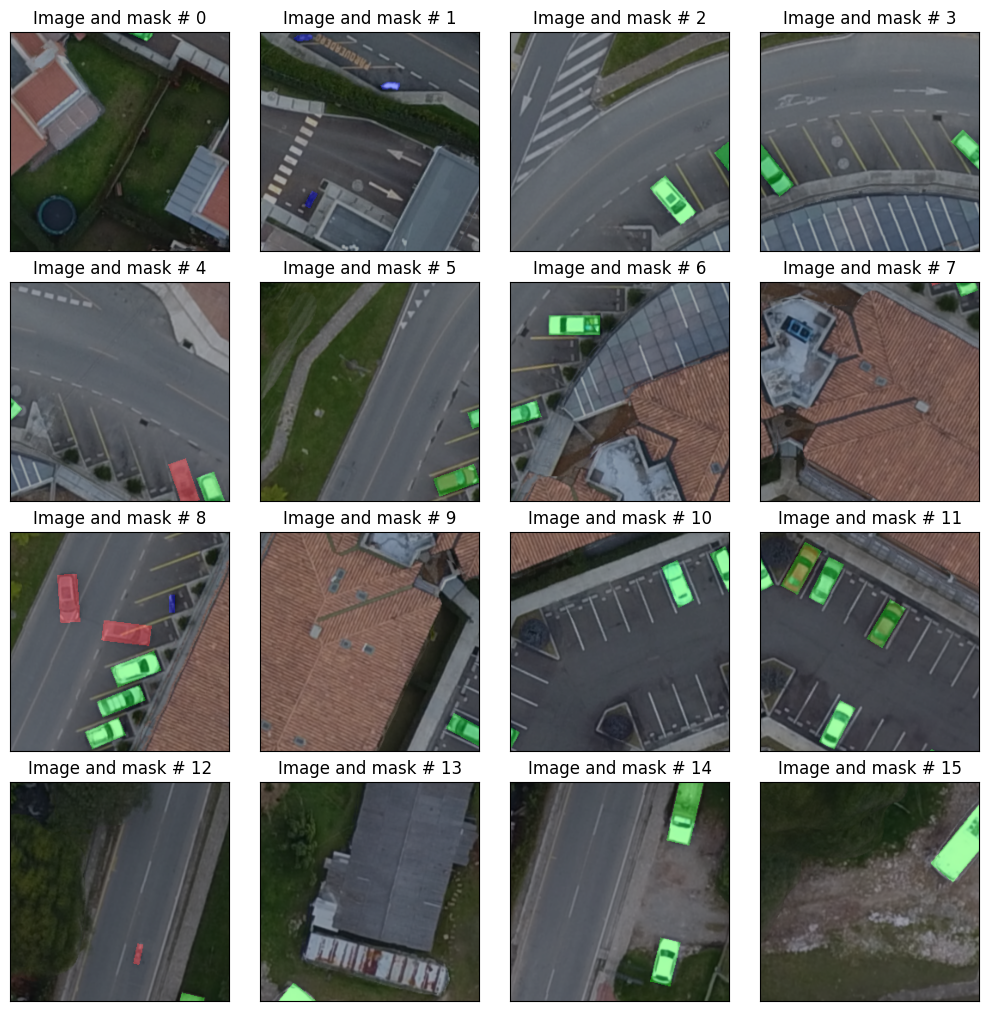

In [11]:
# Getting some patches visualization by overlapping with the proper masks
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)
fig,ax = plt.subplots(4,4,layout='constrained')

for i in range(4):
  for j in range(4):
    ax[i,j].imshow(image_patches[(i*4)+j,:,:,:])
    ax[i,j].imshow(mask_patches[(i*4)+j,:,:,:],alpha=0.35)
    ax[i,j].tick_params(left = False, right = False , labelleft = False ,
    labelbottom = False, bottom = False, labeltop = False)
    ax[i,j].set_title(f'Image and mask # {(i*4)+j}')

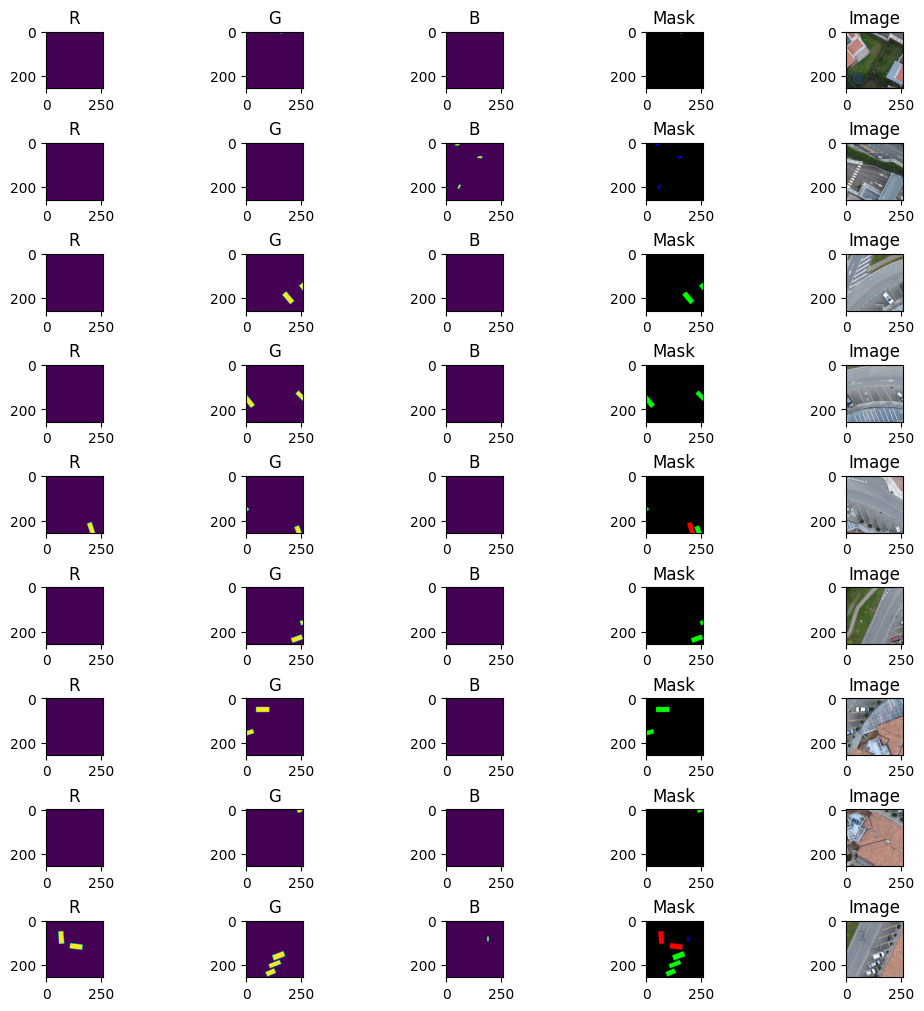

In [12]:
# masks have three color channel
mpl.rcParams['figure.figsize'] = (10,10)
fig,ax = plt.subplots(9,5,layout = 'constrained')
for i in range(9):
  for j in range(3):
    if j== 0: tit = 'R'
    elif j== 1: tit = 'G'
    elif j== 2: tit = 'B'
    ax[i,j].imshow(mask_patches[i,:,:,j])
    ax[i,j].set_title(tit)
  ax[i,3].imshow(mask_patches[i,:,:,:])
  ax[i,3].set_title('Mask')
  ax[i,4].imshow(image_patches[i,:,:,:])
  ax[i,4].set_title('Image')

In [13]:
# Crear un dataset a partir de los parches de imágenes y máscaras
#plt.imshow(image_patches[3,...])
#dataset1 = tf.data.Dataset.from_tensor_slices((image_patches[0:5,...], mask_patches[0:5,...])) # Checking the distribution of images and patches
dataset1 = tf.data.Dataset.from_tensor_slices((image_patches,mask_patches))

In [14]:
list1 = [0,1,2,3,4]
list2 = [5,6,7,8,9]
data = tf.data.Dataset.from_tensor_slices((list1,list2))
for e in data:
  print(e[0],e[1],np.shape(e),np.shape(e[0]))

tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(5, shape=(), dtype=int32) (2,) ()
tf.Tensor(1, shape=(), dtype=int32) tf.Tensor(6, shape=(), dtype=int32) (2,) ()
tf.Tensor(2, shape=(), dtype=int32) tf.Tensor(7, shape=(), dtype=int32) (2,) ()
tf.Tensor(3, shape=(), dtype=int32) tf.Tensor(8, shape=(), dtype=int32) (2,) ()
tf.Tensor(4, shape=(), dtype=int32) tf.Tensor(9, shape=(), dtype=int32) (2,) ()


In [77]:
mat1 = np.array([[0,1,2],
        [3,4,5],
        [6,7,8]])
mat2 = np.array([[8,7,6],
        [5,4,3],
        [2,1,0]])
mat3 = np.array([[1,1,1],
        [1,1,1],
        [1,1,1]])
mat4 = np.array([[2,2,2],
        [2,2,2],
        [2,2,2]])
data = tf.data.Dataset.from_tensor_slices((mat1,mat2,mat3,mat4))
for e in data:
  print(e[0],e[1],e[2],e[3],np.shape(e),np.shape(e[0]))

tf.Tensor([0 1 2], shape=(3,), dtype=int64) tf.Tensor([8 7 6], shape=(3,), dtype=int64) tf.Tensor([1 1 1], shape=(3,), dtype=int64) tf.Tensor([2 2 2], shape=(3,), dtype=int64) (4, 3) (3,)
tf.Tensor([3 4 5], shape=(3,), dtype=int64) tf.Tensor([5 4 3], shape=(3,), dtype=int64) tf.Tensor([1 1 1], shape=(3,), dtype=int64) tf.Tensor([2 2 2], shape=(3,), dtype=int64) (4, 3) (3,)
tf.Tensor([6 7 8], shape=(3,), dtype=int64) tf.Tensor([2 1 0], shape=(3,), dtype=int64) tf.Tensor([1 1 1], shape=(3,), dtype=int64) tf.Tensor([2 2 2], shape=(3,), dtype=int64) (4, 3) (3,)


In [118]:
# Visualization of TENSORFLOW DATASET STRUCTURE
# aux = 0
# mpl.rcParams['figure.figsize'] = (7,15)
# fig,ax = plt.subplots(5,2,layout = 'constrained')
# plt.suptitle('Dataset tensorflow structure visualization')
# for element in dataset1:
#   ax[aux,0].imshow(element[0])
#   ax[aux,1].imshow(element[1])
#   aux+=1

The size of images in dataset:

In [120]:
dataset1

<_TensorSliceDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(256, 256, 3), dtype=tf.uint8, name=None))>

## **Display Data**

Function for show the image, mask and prediction mask

In [15]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ["Input Image", "True Mask", "Predicted Mask"]

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis("off")
  plt.show()

## **Using only one class**

This code defines a function called `convertir_mascara` and applies it to a dataset using the `map` function.

The `convertir_mascara` function performs the following actions:

1. Casts the input mask tensor to `float32` data type.
2. Creates a new mask tensor filled with zeros, with dimensions `(256, 256, 1)`.
3. Assigns values corresponding to each class in the mask:
   - If all RGB values in the mask are `[0, 0, 0]`, assigns `0.0` to the corresponding pixel in the converted mask.
   - If all RGB values are `[255, 0, 0]`, assigns `0.0`.
   - If all RGB values are `[0, 255, 0]`, assigns `1.0`.
   - If all RGB values are `[0, 0, 255]`, assigns `0.0`.
4. Returns the converted mask.

The code then applies the `convertir_mascara` function to each element in the `dataset` using the `map` function. The `map` function takes a lambda function that applies the conversion function to each `(image, mask)` pair in the dataset, resulting in a new dataset named `mapped_dataset`. The images in the dataset remain unchanged, while the masks are converted using the `convertir_mascara` function.

In [16]:
def convertir_mascara_1class(mascara):
    mascara = tf.cast(mascara, dtype=tf.float32)
    mascara_convertida = tf.zeros((256, 256, 1), dtype=tf.float32)

    # Asigna valores correspondientes a cada clase
    mascara_convertida = tf.where(tf.reduce_all(tf.equal(mascara, [0, 0, 0]), axis=-1, keepdims=True), 0.0, mascara_convertida)
    mascara_convertida = tf.where(tf.reduce_all(tf.equal(mascara, [255, 0, 0]), axis=-1, keepdims=True), 0.0, mascara_convertida)
    mascara_convertida = tf.where(tf.reduce_all(tf.equal(mascara, [0, 255, 0]), axis=-1, keepdims=True), 1.0, mascara_convertida)
    mascara_convertida = tf.where(tf.reduce_all(tf.equal(mascara, [0, 0, 255]), axis=-1, keepdims=True), 0.0, mascara_convertida)

    return mascara_convertida

In [55]:
def convertir_mascara_2class(mascara):
    mascara = tf.cast(mascara, dtype=tf.float32)
    mascara_convertida = tf.zeros((256, 256, 2), dtype=tf.float32)

    # Asigna valores correspondientes a cada clase
    mascara_convertida[:,:,0] = tf.where(tf.reduce_all(tf.equal(mascara, [0, 0, 0]), axis=-1, keepdims=True), 0.0, mascara_convertida)
    mascara_convertida[:,:,0] = tf.where(tf.reduce_all(tf.equal(mascara, [255, 0, 0]), axis=-1, keepdims=True), 0.0, mascara_convertida)
    mascara_convertida[:,:,0] = tf.where(tf.reduce_all(tf.equal(mascara, [0, 255, 0]), axis=-1, keepdims=True), 1.0, mascara_convertida)
    mascara_convertida[:,:,0] = tf.where(tf.reduce_all(tf.equal(mascara, [0, 0, 255]), axis=-1, keepdims=True), 0.0, mascara_convertida)

    mascara_convertida[:,:,1] = tf.where(tf.reduce_all(tf.equal(mascara, [0, 0, 0]), axis=-1, keepdims=True), 0.0, mascara_convertida)
    mascara_convertida[:,:,1] = tf.where(tf.reduce_all(tf.equal(mascara, [255, 0, 0]), axis=-1, keepdims=True), 1.0, mascara_convertida)
    mascara_convertida[:,:,1] = tf.where(tf.reduce_all(tf.equal(mascara, [0, 255, 0]), axis=-1, keepdims=True), 0.0, mascara_convertida)
    mascara_convertida[:,:,1] = tf.where(tf.reduce_all(tf.equal(mascara, [0, 0, 255]), axis=-1, keepdims=True), 0.0, mascara_convertida)

    return mascara_convertida

In [69]:
tf_array = tf.zeros((10,10,2))
print(tf_array.shape)
#tf_array[:,:,1] = 1
#tf_array

(10, 10, 2)


In [117]:
#tf_array[0,0,0]=3

In [116]:
np_array = np.zeros((10,10,2))
np_array.shape
np_array[:,:,1]=1
#np_array

In [17]:
# Mapping the whole mask to only 1 class, the Green channel for classification
mapped_dataset = dataset1.map(lambda x, y: (x, convertir_mascara_1class(y)))
type(mapped_dataset)
mapped_dataset

<_MapDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(256, 256, 1), dtype=tf.float32, name=None))>

In [124]:
# Mapping the whole mask for 2 classes, the Red and Green channel for classification
# mapped_dataset_2 = dataset1.map(lambda x, y: (x, convertir_mascara_2class(y)))
# type(mapped_dataset_2)
# mapped_dataset_2

In [18]:
aux = 0
for e in mapped_dataset:
    aux += 1
    print(aux,len(e),type(e),np.shape(e[0]),np.shape(e[1]))

1 2 <class 'tuple'> (256, 256, 3) (256, 256, 1)
2 2 <class 'tuple'> (256, 256, 3) (256, 256, 1)
3 2 <class 'tuple'> (256, 256, 3) (256, 256, 1)
4 2 <class 'tuple'> (256, 256, 3) (256, 256, 1)
5 2 <class 'tuple'> (256, 256, 3) (256, 256, 1)
6 2 <class 'tuple'> (256, 256, 3) (256, 256, 1)
7 2 <class 'tuple'> (256, 256, 3) (256, 256, 1)
8 2 <class 'tuple'> (256, 256, 3) (256, 256, 1)
9 2 <class 'tuple'> (256, 256, 3) (256, 256, 1)
10 2 <class 'tuple'> (256, 256, 3) (256, 256, 1)
11 2 <class 'tuple'> (256, 256, 3) (256, 256, 1)
12 2 <class 'tuple'> (256, 256, 3) (256, 256, 1)
13 2 <class 'tuple'> (256, 256, 3) (256, 256, 1)
14 2 <class 'tuple'> (256, 256, 3) (256, 256, 1)
15 2 <class 'tuple'> (256, 256, 3) (256, 256, 1)
16 2 <class 'tuple'> (256, 256, 3) (256, 256, 1)
17 2 <class 'tuple'> (256, 256, 3) (256, 256, 1)
18 2 <class 'tuple'> (256, 256, 3) (256, 256, 1)
19 2 <class 'tuple'> (256, 256, 3) (256, 256, 1)
20 2 <class 'tuple'> (256, 256, 3) (256, 256, 1)
21 2 <class 'tuple'> (256, 25

In [125]:
# Checking TENSORFLOW MAPPED_DATASET

# aux = 0
# mpl.rcParams['figure.figsize'] = (7,15)
# fig,ax = plt.subplots(5,2,layout = 'constrained')
# plt.suptitle('Mapped dataset structure visualization (1 class in mask)')
# for element in mapped_dataset:
#   ax[aux,0].imshow(element[0])
#   ax[aux,1].imshow(element[1])
#   im1 = ax[aux,1].imshow(element[1])
#   fig.colorbar(im1)
#   aux+=1


This code defines a function called `filter_func` that filters the `mapped_dataset` based on certain criteria using the `filter` function.

The `filter_func` function performs the following actions:

1. Reshapes the mask tensor into a 1-dimensional tensor.
2. Uses `tf.unique` to obtain the unique classes present in the mask.
3. Checks if the number of unique classes (`tf.size(unique_classes)`) is greater than or equal to 2.
   - If there are two or more unique classes, it returns `True`, indicating that the image and mask pair should be included in the filtered dataset.
   - If there are fewer than two unique classes, it returns `False`, indicating that the image and mask pair should be filtered out.

The code then applies the `filter_func` function to each element in the `mapped_dataset` using the `filter` function. The `filter` function takes the lambda function `filter_func` as an argument and returns a new dataset named `filtered_dataset` that contains only the image and mask pairs that satisfy the filtering criteria.

In [79]:
#tf.reshape(mapped_dataset,[-1])

In [19]:
import tensorflow as tf

def filter_func(image, mask):
    unique_classes = tf.unique(tf.reshape(mask, [-1]))[0]
    print(unique_classes)
    print(tf.reshape(mask, [-1])) # = 256 * 256 = 65536
    print(tf.unique(tf.reshape(mask, [-1]))[1])
    return tf.size(unique_classes) >= 2

filtered_dataset = mapped_dataset.filter(filter_func)

dataset_length = 0
for _ in filtered_dataset:
    dataset_length += 1

print("Longitud  del dataset filtrado:", dataset_length)

Tensor("Unique:0", shape=(None,), dtype=float32)
Tensor("Reshape_1:0", shape=(65536,), dtype=float32)
Tensor("Unique_1:1", shape=(65536,), dtype=int32)
Longitud  del dataset filtrado: 1043


In [127]:
# # Checking the FILTERED DATASET
# print(type(filtered_dataset))
# for f in filtered_dataset:
#   #print(f[0])
#   plt.figure(figsize=(5,5))
#   plt.imshow(f[0])
#   plt.imshow(f[1],alpha=0.333)
#   print(f[1].shape)

## **Splitting data**

train/test/val split

In [20]:
# dividir el dataset en conjuntos de entrenamiento, validación y prueba
total_samples = (dataset_length)
train_size = int(0.7 * total_samples)
val_size = int(0.15 * total_samples)
test_size = total_samples - train_size - val_size
print(f'Total samples: {total_samples} \nTrain size: {train_size} \nValidation size: {val_size} \nTest size: {test_size}')

train_dataset = filtered_dataset.take(train_size)
val_dataset = filtered_dataset.skip(train_size).take(val_size)
test_dataset = filtered_dataset.skip(train_size + val_size).take(test_size)

Total samples: 1043 
Train size: 730 
Validation size: 156 
Test size: 157


In [50]:
# Train dataset examples visualization
# for t in train_dataset:
#   #plt.figure()
#   plt.imshow(t[0])
#   plt.imshow(t[1],alpha = 0.5, cmap = 'inferno')
#   plt.title('Train dataset examples visualization overlapping Mask-label',fontsize=12)

In [27]:
BATCH_SIZE = 16
BUFFER_SIZE = 100

In [28]:
train_batches = train_dataset.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_batches = train_batches.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_batches = test_dataset.batch(BATCH_SIZE)
test_batches = test_dataset.batch(BATCH_SIZE)

## **Unet**

In [24]:
def double_conv_block(x, n_filters):

    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "same", kernel_initializer = "he_normal")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "same", kernel_initializer = "he_normal")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "same", kernel_initializer = "he_normal")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    # dropout
    x = layers.Dropout(0.2)(x)

    return x

def downsample_block(x, n_filters):
    f = double_conv_block(x, n_filters)
    p = layers.MaxPool2D(2)(f)
    p = layers.Dropout(0.2)(p)

    return f, p

def upsample_block(x, conv_features, n_filters):
    # upsample
    x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
    # concatenate
    x = layers.concatenate([x, conv_features])
    # dropout
    x = layers.Dropout(0.2)(x)
    # Conv2D twice with ReLU activation
    x = double_conv_block(x, n_filters)

    return x

def build_unet_model(): # Main builder!!

    # inputs
    inputs = layers.Input(shape=(256,256,3))

    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 64)
    # 2 - downsample
    f2, p2 = downsample_block(p1, 128)
    # 3 - downsample
    f3, p3 = downsample_block(p2, 256)
    # 4 - downsample
    f4, p4 = downsample_block(p3, 512)

    # 5 - bottleneck
    bottleneck = double_conv_block(p4, 1024)
    bottleneck = layers.Dropout(0.3)(bottleneck)

    # decoder: expanding path - upsample
    # 6 - upsample
    u6 = upsample_block(bottleneck, f4, 512)
    # 7 - upsample
    u7 = upsample_block(u6, f3, 256)
    # 8 - upsample
    u8 = upsample_block(u7, f2, 128)
    # 9 - upsample
    u9 = upsample_block(u8, f1, 64)

    # outputs
    outputs = layers.Conv2D(1, 1, padding="same", activation = "sigmoid")(u9)

    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")


    return unet_model


In [25]:
# Unet Image Segmentation Convolutional Neural Network definition:
unet_model = build_unet_model()
unet_model.summary()
#loss = keras.losses.sparse_categorical_crossentropy()
unet_model.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss='binary_crossentropy',
                   metrics=["accuracy"])

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

## **Training**

In [46]:
keras.backend.clear_session()
NUM_EPOCHS = 10
#BATCH_SIZE = 16
STEPS_PER_EPOCH = total_samples // BATCH_SIZE

VAL_SUBSPLITS = 5
VALIDATION_STEPS = test_size // BATCH_SIZE // VAL_SUBSPLITS

model_history = unet_model.fit(train_batches,
                               epochs=NUM_EPOCHS,
                               steps_per_epoch=STEPS_PER_EPOCH,
                               validation_steps=VALIDATION_STEPS,
                               validation_data=validation_batches,)

Epoch 1/10
65/65 [==============================] - 125s 2s/step - loss: 0.0740 - accuracy: 0.9736 - val_loss: 0.2229 - val_accuracy: 0.9420
Epoch 2/10
65/65 [==============================] - 122s 2s/step - loss: 0.0817 - accuracy: 0.9713 - val_loss: 0.2242 - val_accuracy: 0.8175
Epoch 3/10
65/65 [==============================] - 122s 2s/step - loss: 0.0751 - accuracy: 0.9727 - val_loss: 0.1685 - val_accuracy: 0.9669
Epoch 4/10
65/65 [==============================] - 122s 2s/step - loss: 0.0776 - accuracy: 0.9720 - val_loss: 0.2369 - val_accuracy: 0.9011
Epoch 5/10
65/65 [==============================] - 121s 2s/step - loss: 0.0766 - accuracy: 0.9725 - val_loss: 0.5648 - val_accuracy: 0.8227
Epoch 6/10
65/65 [==============================] - 120s 2s/step - loss: 0.0649 - accuracy: 0.9775 - val_loss: 0.6403 - val_accuracy: 0.8229
Epoch 7/10
65/65 [==============================] - 122s 2s/step - loss: 0.0750 - accuracy: 0.9739 - val_loss: 0.2753 - val_accuracy: 0.8175
Epoch 8/10
65

In [45]:
VALIDATION_STEPS

1

Text(0.5, 1.0, 'Loss function')

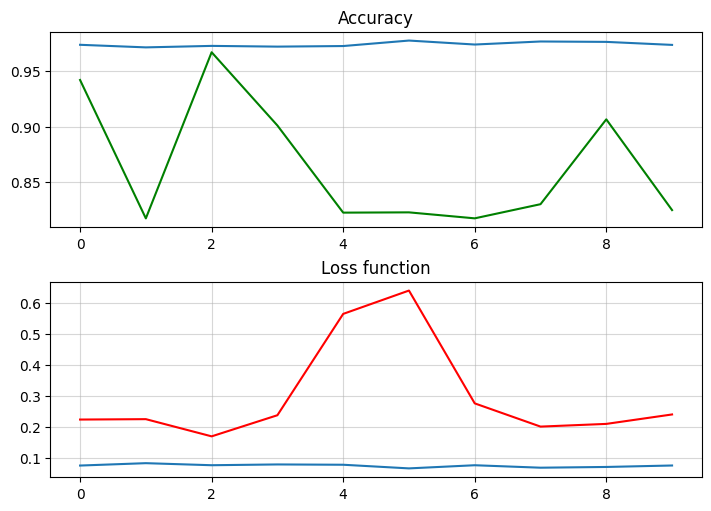

In [47]:
# plotting the loss and metric evaluation curves
mpl.rcParams['figure.figsize'] = (7,5)
fig,ax = plt.subplots(2,1,layout='constrained')
ax[0].plot(model_history.history['accuracy'])
ax[0].plot(model_history.history['val_accuracy'], color='green')
ax[0].grid(alpha=0.5)
ax[0].set_title('Accuracy')

ax[1].plot(model_history.history['loss'])
ax[1].plot(model_history.history['val_loss'],color='red')
ax[1].grid(alpha=0.5)
ax[1].set_title('Loss function')

## **Visualization of predictions**

In [48]:
def create_mask(pred_mask, threshold=0.2):
  pred_mask = tf.cast(pred_mask, dtype=tf.float32)  # convertir a float
  pred_mask = tf.where(pred_mask > threshold, 1.0, 0.0)  # usar float para el threshold
  return pred_mask[0]

def show_predictions(dataset, model, num):
  if dataset:
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  else:
    display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

In [49]:
show_predictions(test_batches, unet_model, 16)

Output hidden; open in https://colab.research.google.com to view.